# Exercise 1.2
Load the image `logo.png` and compute the economy SVD.
- A. Compute the relative reconstruction error of the truncated SVD in the Frobenius norm as a function of the rank $r$.
    $$\| X - \tilde{X} \|^2_F=\sum_{k=r+1}^{m}{\sigma_k^2}$$

- B. Square this error to compute the fraction of missing variance as a function of $r$.
- C. Plot 1 minus the error or missing variance to visualize the amount of norm or variance captured at a given rank $r$. 
- D. Plot these quantities along with the cumulative sum of singular values as a function of $r$. 
- E. Find the rank $r$ where the reconstruction captures 99% of the total variance. 
- F. Compare the rank found in part E with the rank $r$ where the reconstruction captures 99% in the Frobenius norm.
- G. Compare the rank found in part E with the rank $r$ that captures 99% of the cumulative sum of singular values.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from IPython.display import display, Latex, Math

# 1. Load the image and form a 2D array A (grayscale)
image = '/workspaces/steve-brunton-book/images/logo.png'
A = imread(image)
if A.ndim == 3:
    A = np.mean(A, axis=2)   # convert RGB → grayscale
m, n = A.shape
display(Latex((rf"$A$ is ${m}\times{n}$ and $\| A \|_F$ = {np.linalg.norm(A, 'fro'):.4e}")));
display(Latex(rf"The rank of $A$ is $r$ = {np.linalg.matrix_rank(A)}."));


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

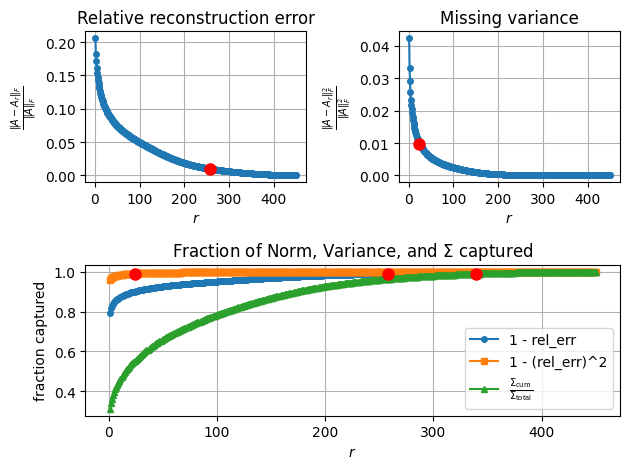

In [11]:
# 2. Compute the *economy* SVD (full_matrices=False)
#    A = U @ diag(S) @ Vh, with U (m×k), Vh (k×n), k = min(m,n)
U, S, Vh = np.linalg.svd(A, full_matrices=False)
k = len(S)

# Pre‐compute total Frobenius norm and total variance (sum of squares of singular values)
normA = np.linalg.norm(A, 'fro')    # Frobenius norm of data matrix
total_var = np.sum(S**2)        # total variance (sum of squares of singular values)

# Preallocate arays
rank = np.arange(1, k+1)        # rank r = [1,2,...,k]
rel_err = np.zeros(k)           # part A - will hold relative Frobenius errors
miss_var_frac = np.zeros(k)     # part B - will hold fraction of variance 'missing' (i.e., not captured) in low-rank approximation
captured_norm = np.zeros(k)     # part C - will hold 1 - rel_error (fraction of norm captured in low-rank approximation)
captured_var = np.zeros(k)      # part D - will hold 1 - (rel_error)^2 (fraction of variance captured) 

# 3. Loop over rank r to compute all quantities
for idx, r in enumerate(rank):
    # Low-rank reconstruction Ar
    Ur = U[:, :r]       # U_r: first r columns of U (mxr)
    Sr = S[:r]          # S_r: first r singular values 
    Vhr = Vh[:r, :]     # Vh_r: first r rows of Vh (rxn)
    Ar = Ur @ np.diag(Sr) @ Vhr

    # A) relative reconstruction error in Frobenius norm
    errF = np.linalg.norm(A - Ar, 'fro') # Frobenius norm of error ||A - Ar||_F
    rel_err[idx] = errF / normA

    # B) fraction of "missing" variance = (errF / normA)^2
    miss_var_frac[idx] = rel_err[idx]**2

    # C) amount "captured" in norm or variancce
    captured_norm[idx] = 1.0 - rel_err[idx]
    captured_var[idx] = 1.0 - miss_var_frac[idx]

# D) cumulative sum of singular values (normalized)
cumsum_S = np.cumsum(S)     # cumulative sum of singular values
cum_S_frac = cumsum_S / cumsum_S[-1]   # cumulative sum of singular values normalized by total sum of sigma_i

# E) find rank for greater than or equal to 99% variance captured (captured_var)
r_var99 = np.searchsorted(captured_var, 0.99) + 1

# F) find rank for greater than or equal to 99% norm captured (captured_norm)
r_norm99 = np.searchsorted(captured_norm, 0.99) + 1

# G) find rank for greater than or equal to 99% cumulative singular-value sum
r_sigs99 = np.searchsorted(cum_S_frac, 0.99) + 1

display(Latex(rf"Rank capturing $\geq 99\%$ variance: r = {r_var99}"));
display(Latex(rf"Rank capturing $\geq 99\%$ norm: r = {r_norm99}"));
display(Latex(rf"Rank capturing $\geq 99\%$ cumulative singular-value sum: r = {r_sigs99}"));

# Part A: Plot rel_err vs r
plt.subplot(2, 2, 1)
plt.plot(rank, rel_err, '-o', markersize=4)
plt.plot(r_norm99, rel_err[r_norm99+1], 'ro', ms=8, label=None)
plt.xlabel(r'$r$')
plt.ylabel(r'$\frac{\| A - A_r \|_F}{\| A \|_F}$')
plt.title(r'Relative reconstruction error')
plt.grid(True)

# Part B: miss_var_frac vs r
plt.subplot(2, 2, 2)
plt.plot(rank, miss_var_frac, '-o', markersize=4)
plt.plot(r_var99,  miss_var_frac[r_var99],   'ro', ms=8, label=None)
plt.xlabel(r'$r$')
plt.ylabel(r'$\frac{\| A - A_r \|_F^2}{\| A \|_F^2}$')
plt.title(r'Missing variance');
plt.grid(True)

# Part C & D: captured_norm, captured_var, cum_S_frac
plt.subplot(2, 1, 2)
plt.plot(rank, captured_norm, label='1 - rel_err', marker='o', ms=4)
plt.plot(rank, captured_var, label='1 - (rel_err)^2', marker='s', ms=4)
plt.plot(rank, cum_S_frac, label=r'$\frac{\Sigma_\text{cum}}{\Sigma_\text{total}}$', marker='^', ms=4)
plt.xlabel(r'$r$');
plt.ylabel('fraction captured')
plt.title(r'Fraction of Norm, Variance, and $\Sigma$ captured')
plt.legend(loc='best')
plt.grid(True)

plt.plot(r_norm99, captured_norm[r_norm99-1], 'ro', ms=8, label=None)
plt.plot(r_var99,  captured_var[r_var99-1],   'ro', ms=8, label=None)
plt.plot(r_sigs99, cum_S_frac[r_sigs99-1],    'ro', ms=8, label=None)

plt.tight_layout()
plt.show()